In [77]:
# for plotting wav files
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# for recording wav files
import sounddevice as sd
import soundfile as sf

# for playing wav files
import IPython.display as ipd

# operating system utilities
import os

import numpy as np

https://musicinformationretrieval.com/ipython_audio.html

https://colab.research.google.com/github/earthspecies/from_zero_to_DSP/blob/master/04_How_to_visualize_sound%3F.ipynb#scrollTo=mrZEi6zNr6xc

https://colab.research.google.com/github/gened1080/intro/blob/master/Intro_Fall_2020.ipynb#scrollTo=BJet7qdcwuv2

In [78]:
FILENAME = 'myrecording.wav'

plt.rcParams["figure.figsize"] = (14, 5)

In [80]:
def record_wav_file(filename, seconds, samplerate=44100, channels=1):
    if os.path.exists(filename):
        os.remove(filename)
    myrecording = sd.rec(frames=int(seconds*samplerate), samplerate=samplerate, channels=1)
    sd.wait()  # Wait until recording is finished
    sf.write('myrecording.wav', myrecording, samplerate)

record_wav_file(filename=FILENAME, seconds=3)

In [81]:
ipd.Audio(FILENAME) # load a local WAV file

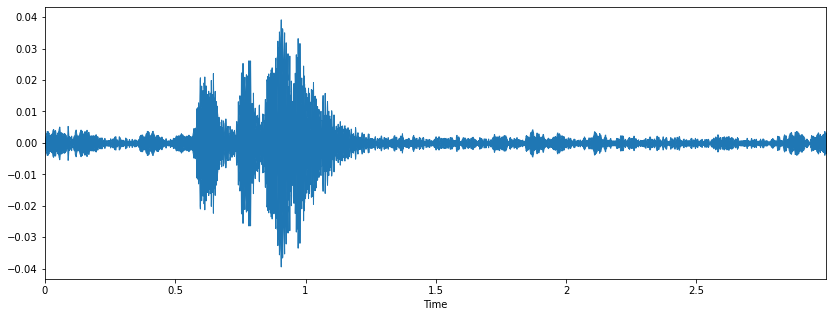

In [82]:
data, samplerate = librosa.load(FILENAME)
librosa.display.waveplot(data, samplerate);

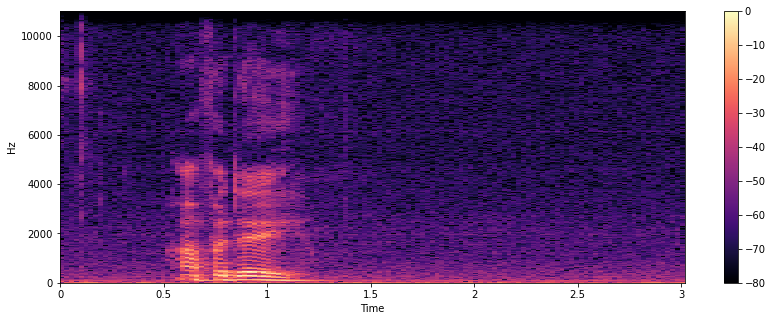

In [84]:
hop_length = 512
X = librosa.stft(data, win_length=1024, hop_length=hop_length)
Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(Xdb, sr=samplerate, hop_length=hop_length, x_axis='time', y_axis='hz')
fig.colorbar(img, ax=ax);